# Mudcard
- **Is there an ideal k=? Ex. Should we do 4, 5, 10 etc for n_splits**
    - There is no clear/magical answer to such questions
    - It depends on how much computational power you have, how many unique groups there are in your dataset, etc.
- **When we get a new dataset, how can we figure out it is imbalanced data or not?**
- **Identifying imbalanced data**
    - Follow the EDA-related questions you practiced in PS3 Problem 1a.
    - Q3: value_counts() applied to your classification target varible tells you how imbalanced your classification problem is.
- **can I use the same dataset for the final project?**
    - Same as what? Please be specific.
    - You cannot use any of the datasets we cover in class or you work with in the problem sets
    - That would be too easy.
- **"Still confused by what ""group"" does in the GroupShuffleSplit.**
    - the variable group describes the group ID of each point in your data
- **wondering if there is a threshold, like how many % of class 1 is considered as imbalanced data.**
    - same as above, there is no clear/magical answer to such questions
    - some people might consider 90-10% ratio imbalanced
    - others might consider 99-1% ratio instead
    - The closer the fraction of class 1 points is to 0, the more likely the problem is imbalanced.

# Evaluation metrics in supervised ML, part 1, classification
By the end of this lecture, you will be able to
- Describe the terms in the confusion matrix
- Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)
- Choose a metric most appropriate for your problem


# The supervised ML pipeline

**0. Data collection/manipulation**: you might have multiple data sources and/or you might have more data than you need
   - you need to be able to read in datasets from various sources (like csv, excel, SQL, parquet, etc)
   - you need to be able to filter the columns/rows you need for your ML model
   - you need to be able to combine the datasets into one dataframe 

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

<span style="background-color: #FFFF00">**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)</span>
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to be transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
<span style="background-color: #FFFF00">**4. Choose an evaluation metric**: depends on the priorities of the stakeholders</span>
   - often requires quite a bit of thinking and ethical considerations
     
**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation or hyperparameter tuning)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

# A word on missing values and preprocessing before we start

- missing values in categorical and ordinal features need to be handled during preprocessing
- we will cover missing values in continuous features later
- DO NOT DROP COLUMNS OR ROWS WITH MISSING VALUES!

## Categorical feature: treat missing values as another category

- the BEST thing you can do!
- already covered in the preprocessing lecture (one hot encoding)
- example: missing values in gender
    - if survey only has options for male/female, missing values are likely because those people are outside the gender binary
    - it is a bad idea to impute (try to guess male or female and thus boxing them into the binary)
- example: native country in the adult data
    - missing data are represented as ` ?`
    - a one-hot encoded feature was assigned to the missing category


## Missing values in an ordinal feature

- treat missing values as one of the ordinal categories
- where does this 'missing' category fits in the ordered list of categories?
- usually it's either the first or the last category
- if you are uncertain, make an experiment
    - pipeline 1: the missing category is the first in the list
    - pipeline 2: the missing category is the second in the list
    - keep your ML pipeline otherwise unchanged
    - check the best validation scores
    - If the validation scores of pipeline 1 vs pipeline 2 are significanrtly different, chose whichever pipeline has a better score
- Any change in the validation score is attributed to the one change you made
- This is the key to scientific experimentation and data-drive decision making

## Missing values in continuous features: more on this later!

# Back to evaluation metrics!
- decide what metric we will use to evaluate the supervised ML model 
   - this is necessary even before we train the model
   - we need to know what single number metric we will use to compare models and to select the best one
- sklearn classifiers have two methods to return predictions
   - .predict_proba which returns the probability that the point belongs to each class with shape (n_samples, n_classes)
   - .predict which returns the predicted class for each point with shape (n_samples)

### .predict_proba vs. .predict

`y_true = [1 0 1 1 0] # the true labels`

`pred_probs = 
[[0.02796171 0.97203829]
 [0.89682444 0.10317556]
 [0.50104129 0.49895871]
 [0.13713222 0.86286778]
 [0.95707434 0.04292566]] # predicted probabilities show the model's confidence`
 
 `y_pred = [1 0 0 1 0] # predicted class`
 - pred_probs
    - first column is the probability that the point belongs to class 0
    - second column is the probability that the point belings to class 1
    - the rows sum to 1
 - y_pred
    - 0 if class 0 probability is equal or larger than 50% (or equivalently if class 1 probability is less than 50%)
    - 1 if class 0 probability is less than 50% (or equivalently of class 1 probability is equal or larger than 50%)

### How to transform predicted probabilities to predicted class?

In [12]:
import numpy as np
y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
# pred_probs_class1 is the second column of pred_probs
pred_probs_class1 = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])
p_crit =  0.5

# If predicted probability is < p_crit (by default 0.5), predicted class is 0, otherwise it is 1.
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 < p_crit] = 0
y_pred[pred_probs_class1 >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 0 1 0 0 0 1]


For now, we focus on evaluation metrics applicable to predicted classes!

We work with y_true and y_pred arrays.

Next, we will work with metrics applicable to pred_probs and regression problems.

## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe the terms in the confusion matrix**
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## The confusion matrix

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`

Let's count how many points we have in four categories:

- true label is 0, predicted label is 0 - **True Negatives**
- true label is 1, predicted label is 1 - **True Positives**
- true label is 0, predicted label is 1 - **False Positive**
- true label is 1, predicted label is 0 - **False Negative**

Generally, the confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

## Back to our example:

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN): 4</b></td>
        <td><b>False Positive (FP): 1</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN): 2</b></td>
        <td><b>True Positive (TP): 3</b></td>
    </tr>
</table>


## In sklearn

In [13]:
from sklearn.metrics import confusion_matrix

y_true = [0,0,1,0,1,1,0,1,0,1]
y_pred = [0,1,1,0,0,1,0,0,0,1]
print(confusion_matrix(y_true,y_pred))

[[4 1]
 [2 3]]


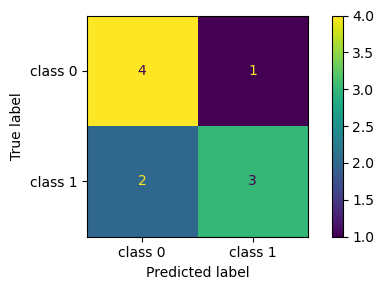

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay
# check out also https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.show()


## Quiz 1

Calculate what fraction of the data points are correctly classified in the example below. Visualize the confusion matrix (not part of the quiz)!

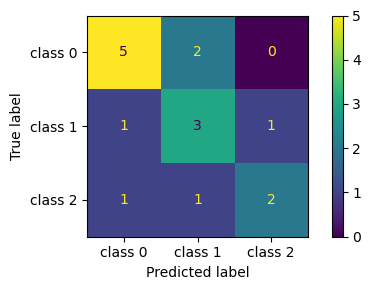

In [15]:
y_true = np.array([0,0,2,1,1,0,2,2,2,0,1,1,0,0,0,1])
y_pred = np.array([0,1,0,1,0,0,2,2,1,0,1,1,0,0,1,2])

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1', 'class 2'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.show()




## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- **Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)**
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## Metrics derived from $C$
$C$ contains $n_{classes}^2$ elements but we need a single number metric to easily compare various models.

For two classes:


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>


Some single number metrics derived from $C$:
- accuracy: fraction of data points correctly classified
   - $a = \sum_i C_{i,i} / \sum C$ = (TP + TN) / (TP + TN + FP + FN)
- recall: what fraction of the condition positive samples are true positives?
   - it measures the ability of the classifier to identify all positive samples
   - in binary classification: R = TP / (TP + FN)
- precision: what fraction of the predicted positive points are true positives?
   - it measures the ability of the classifier to not predict a negative sample to be positive
   - in binary classification: P = TP / (TP + FP)

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

A = (TP + TN) / (TP + TN + FP + FN) 

R = TP / (TP + FN) = TP / CP

P = TP / (TP + FP) = TP / PP

### The f_beta score
Weighted harmonic mean of P and R:
### <center> $f_{\beta} = (1 + \beta^2) \frac{P R}{\beta^2 P + R}$ </center>

If $\beta = 1$, we have the f1 score:
### <center> $f_{1} = 2 \frac{P R}{P + R}$ </center>

If $\beta < 1$, more weight to precision.

If $\beta > 1$, more weight to recall.



### The scores are a function of p_crit

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
y_pred_proba = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])

p_crit = 0.8

y_pred = np.zeros(len(y_pred_proba),dtype=int)
y_pred[y_pred_proba < p_crit] = 0
y_pred[y_pred_proba >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print('accuracy',accuracy_score(y_true,y_pred))
print('recall',recall_score(y_true,y_pred))
print('precision',precision_score(y_true,y_pred))
print('f1',fbeta_score(y_true,y_pred,beta=1))

[0 0 1 0 1 1 0 1 0 1]
[0 0 0 0 0 1 0 0 0 1]
accuracy 0.7
recall 0.4
precision 1.0
f1 0.5714285714285714


## Quiz 2
Given the true and predicted labels, what are the accuracy, recall, precision, and f1 scores? 

Do not use sklearn to answer the question! First construct the confusion matrix and then calculate the scores by hand!

In [6]:
y_true = [0,0,0,1,1,1,0,0]
y_pred = [0,1,0,1,1,0,0,0]



## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- **Choose a metric most appropriate for your problem**


## How should you choose a metric?

- What are the terms in the confusion matrix that you most (or least) care about?
    - In an imbalanced dataset, TNs are large so you should use a metric that doesn't include TN
    - no accuracy
    - f score is usually preferred if your dataset is imbalanced
- Will we act (intervene/apply treatment) on the model's prediction?
    - Is it cheap to act? (e.g., mass email)
       - we want to capture the largest fraction of the condition positive samples even if FPs will be large as a result
       - recall or fbeta with beta > 1 (f1.5 or f2 are often used)
    - Is it expensive to act? Do we have limited resources? Or treatment/action is costly?
       - we want to make sure that the resources are allocated the best way possible
       - want to make sure that a large fraction of the predicted positives are  true positives
       - precision or fbeta with beta < 1 (f0.5 is often used)

## Mudcard